### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

# Make sure we can see all columns for comprehensive review
pd.options.display.max_columns = 30

# Set Seaborn theme
sns.set_theme(style="darkgrid")

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
# make a copy of the original data set for future comparison purposes,
# keeping `data` as the cleansed/transformed set
data_original = data.copy()

# Understand the size of the dataset
shape_original = data_original.shape
shape_original

(12684, 26)

> ##### 2.1. Evaluate the dataset for duplicates  

In [5]:
# What percentage of the dataset has duplicate data, if any?
# If insignificant, may consider dropping them.
duplicated = data.duplicated().mean() * 100
print("Percentage of duplicated observations is: " + str(round(duplicated, 3)) + "%")

Percentage of duplicated observations is: 0.583%


In [6]:
# From above duplicates review, less than 1% of the rows are duplicates, drop duplicates
data = data.drop_duplicates()
shape_cleaned = data.shape

print("Dropped " + str(shape_original[0] - shape_cleaned[0]) + " duplicated observations.") 

Dropped 74 duplicated observations.


> ##### 2.2. Evaluate structural composition of dataset for errors/corrections

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12610 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12503 non-null

In [8]:
# Pet Peeve: Correct a mispelling `passenger`
data = data.rename(columns={'passanger':'passenger'})

In [9]:
# Review if `time` should be re-casted to integers
data["time"].value_counts()

# It may be interesting to translate into a 24-hour integer representation for numerical review, 
# though likely best to keep it as categorical


6PM     3220
7AM     3114
10AM    2271
2PM     2006
10PM    1999
Name: time, dtype: int64

In [10]:
# Review if `expiration` should be re-casted to integers
data["expiration"].value_counts()

1d    7031
2h    5579
Name: expiration, dtype: int64

> ##### 2.3. Evaluate dataset for missing data

In [11]:
# Review data features missing data for modeling impact
# Values are in percentages (%)
missing_data = (data.isna().mean()*100).sort_values(ascending=False)
missing_data


car                     99.143537
CoffeeHouse              1.720856
Restaurant20To50         1.498810
CarryAway                1.189532
RestaurantLessThan20     1.022998
Bar                      0.848533
destination              0.000000
passenger                0.000000
direction_opp            0.000000
direction_same           0.000000
toCoupon_GEQ25min        0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ5min         0.000000
income                   0.000000
occupation               0.000000
education                0.000000
has_children             0.000000
maritalStatus            0.000000
age                      0.000000
gender                   0.000000
expiration               0.000000
coupon                   0.000000
time                     0.000000
temperature              0.000000
weather                  0.000000
Y                        0.000000
dtype: float64

Text(0.5, 0, 'Data Features Within Dataset')

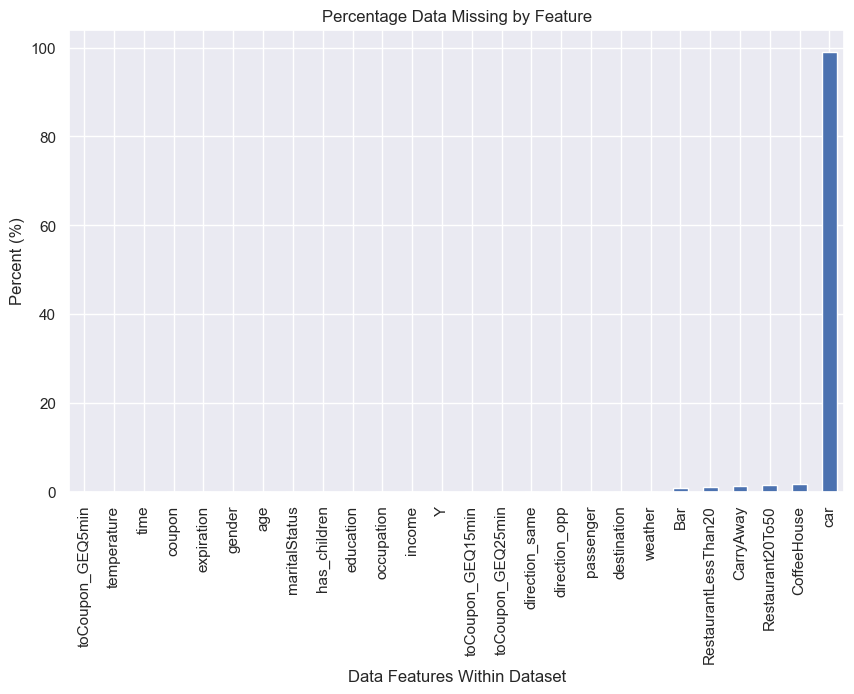

In [12]:
# Let's visualize missing data across any data feature to understand quantitatively which may require additional review
plt.figure(figsize=(10,6))
missing_data.sort_values().plot(kind="bar", title="Percentage Data Missing by Feature")
plt.ylabel("Percent (%)")
plt.xlabel("Data Features Within Dataset")


<AxesSubplot: >

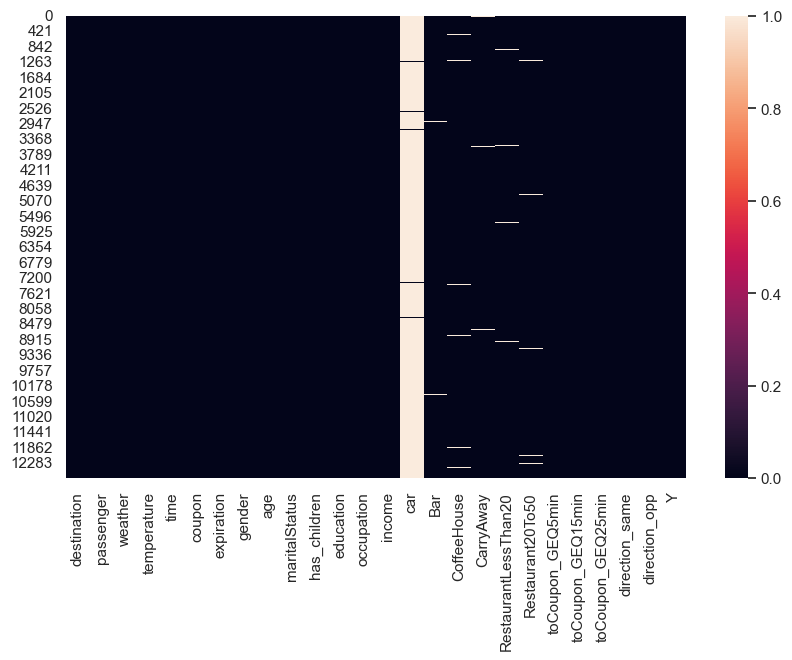

In [13]:
# Let's visually evaluate the missing data across any data feature to understand distribution, 
# for any additional insights
plt.figure(figsize=(10,6))
sns.heatmap(data.isna())


In [61]:
# What would our dataset look like if we aggressively dropped all NaN records?

print("Percentage lost data if we dropped all NaNs: " + 
      str(round((1-(data.dropna().shape[0]/data.shape[0])) * 100)) + "%")

# What would our dataset look like if we dropped all NaN records excluding those from the `car` column?
print("\nPercentage lost data if we dropped all NaNs, except from `car` column: " + 
      str(round((1-(data.dropna(subset=data.columns.difference(['car'])).shape[0]/data.shape[0])) * 100)) + "%")

print("\n*** This is largely due to the `car` feature (axis=1) having more than 99% missing values ***")


Percentage lost data if we dropped all NaNs: 99%

Percentage lost data if we dropped all NaNs, except from `car` column: 5%

*** This is largely due to the `car` feature (axis=1) having more than 99% missing values ***


---
> ##### Insights/Observations: Missing Data 
From the above review of **_percentage data missing by feature_** (above), the following is observed:
> * `car` feature is largely missing (> 99%), and will either need to be imputed or removed from consideration. It may be valuable to drop the column or exclude it if determined to drop NaNs from other features missing data, otherwise we'd drop over 99% of our dataset as a result.
> * `CoffeeHouse`, `Restaurant20to50`, `CarryAway`, `RestaurantLessThan20`, and `Bar` quantitatively have less than 2% missing data and a seemingly uninteresting distribution; therefore we can either keep but ignore the missing data, or drop incomplete records.
---

> ##### 2.4. Evaluate and plot each data feature individually (Univariate analysis)

In [15]:
# Add some runtime configurations (RC) to suppress accepted warnings
plt.rcParams['figure.max_open_warning'] = 50

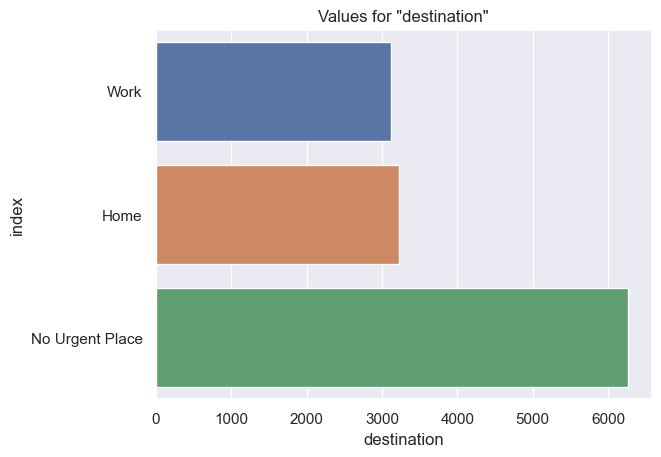

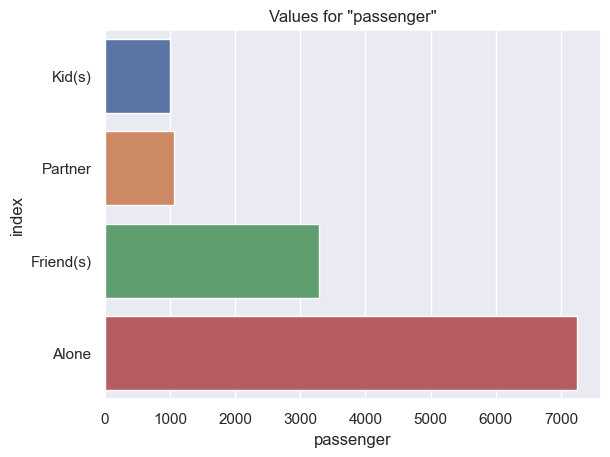

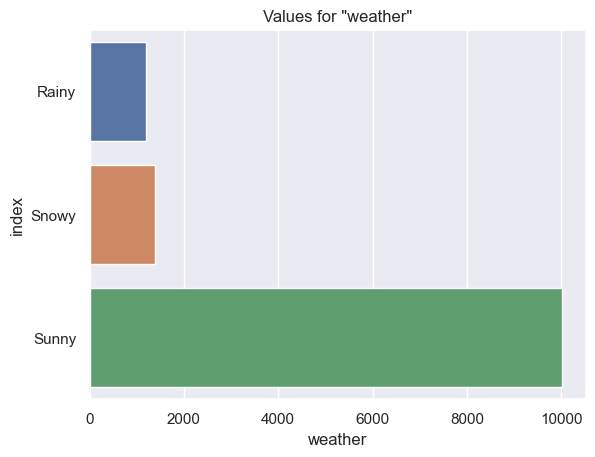

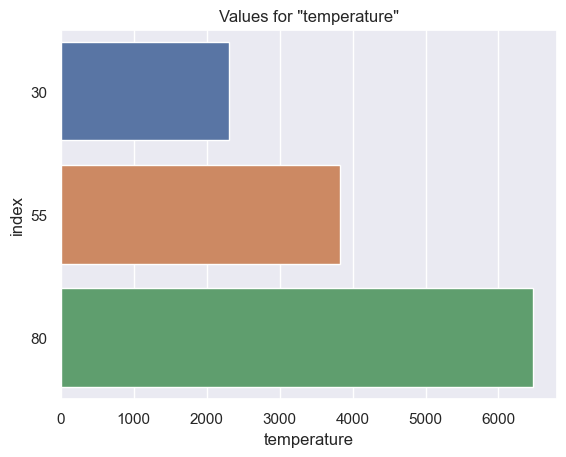

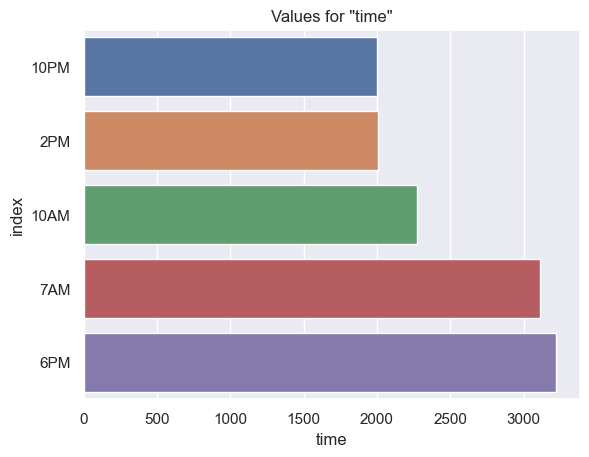

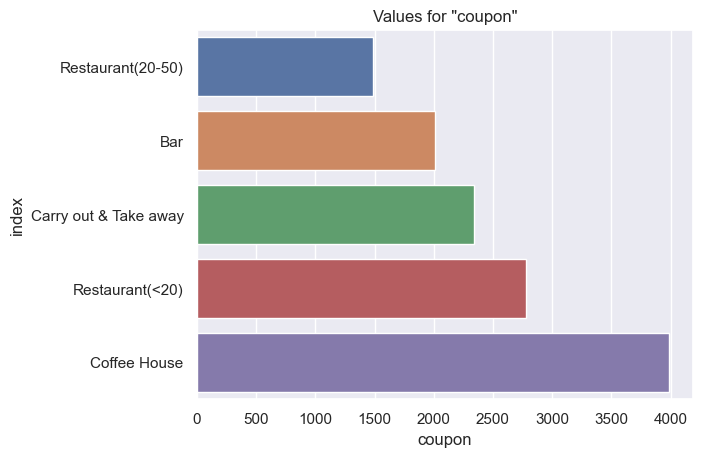

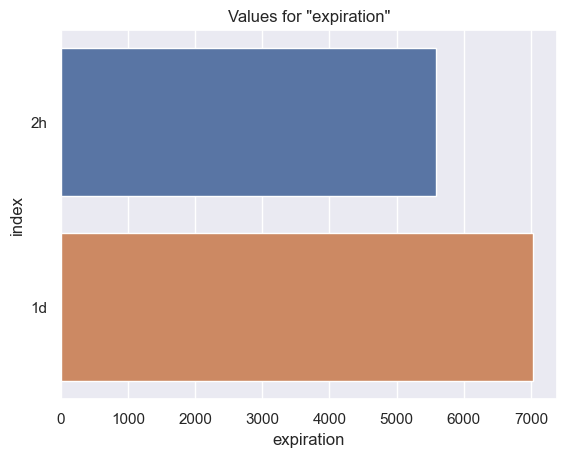

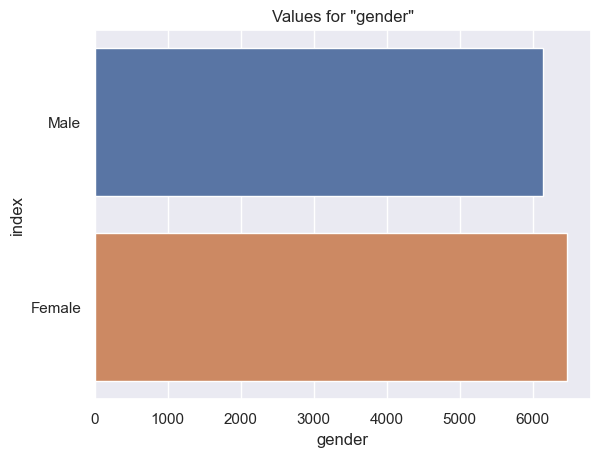

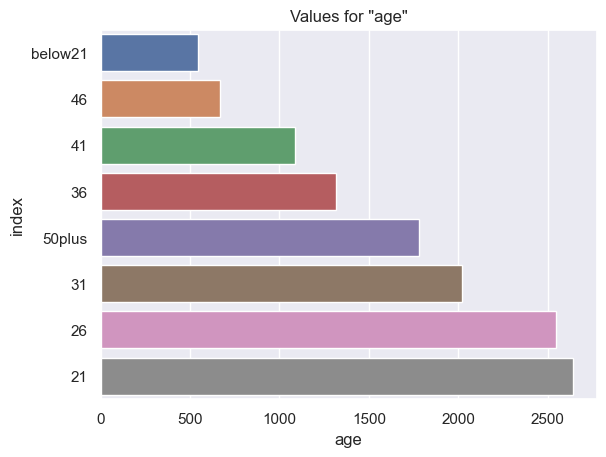

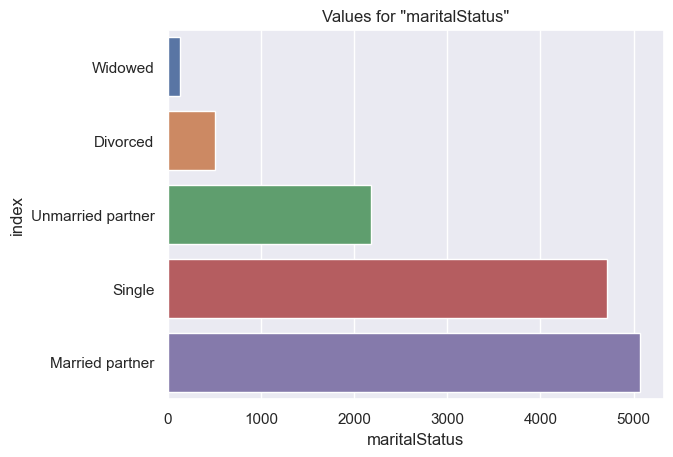

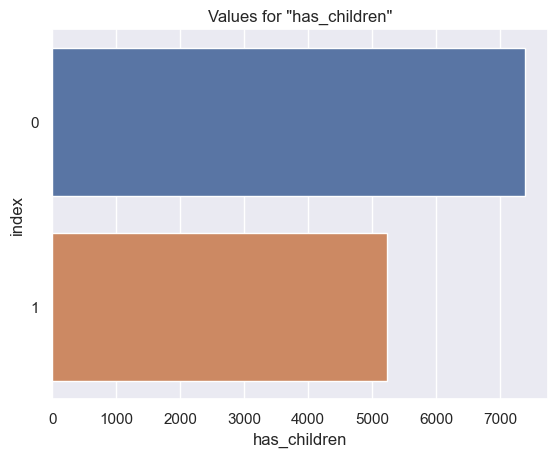

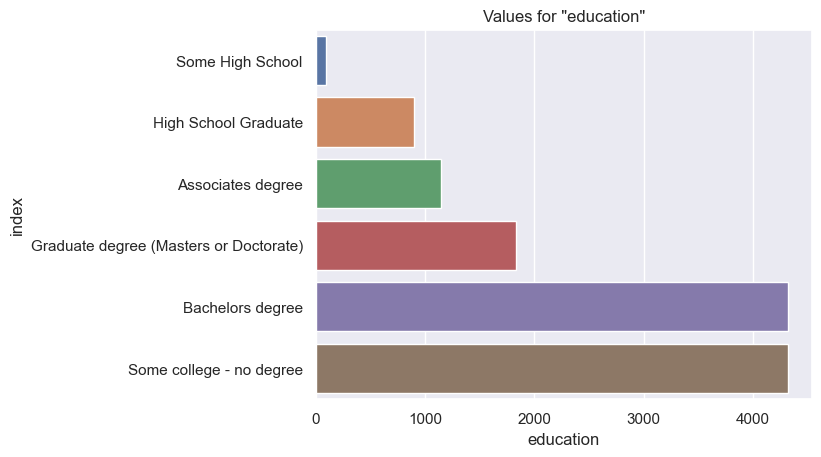

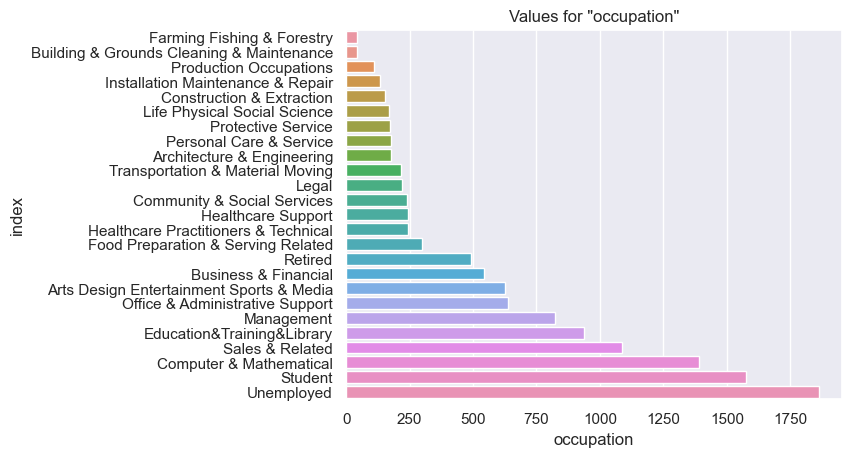

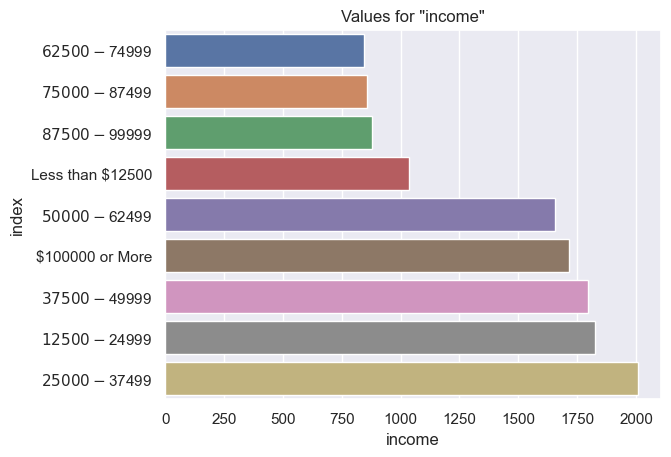

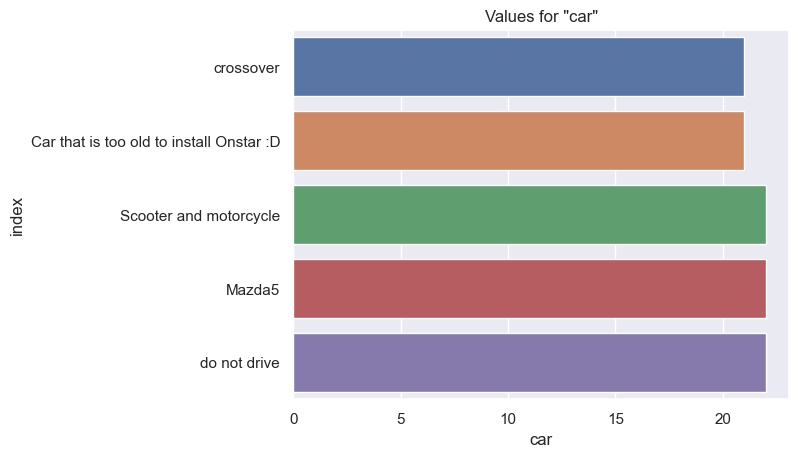

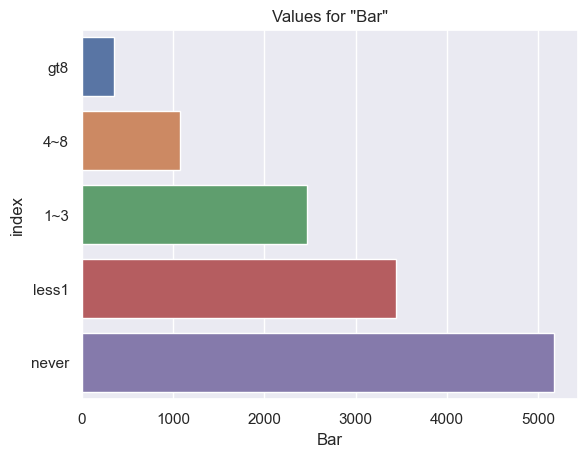

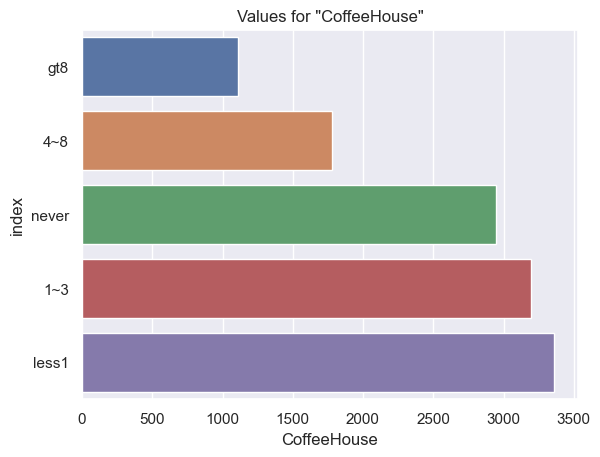

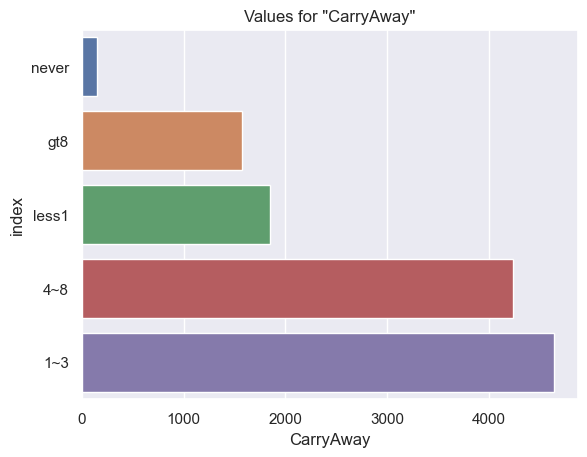

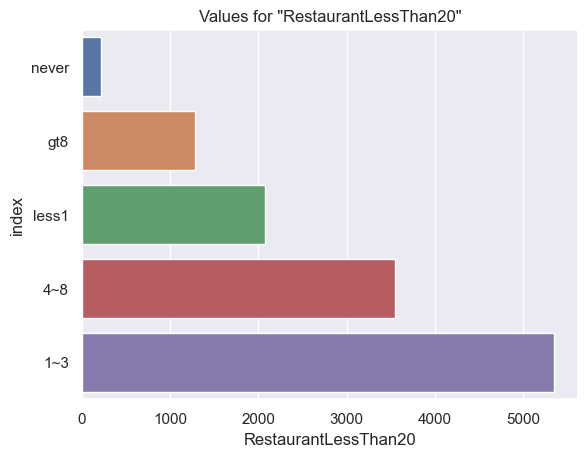

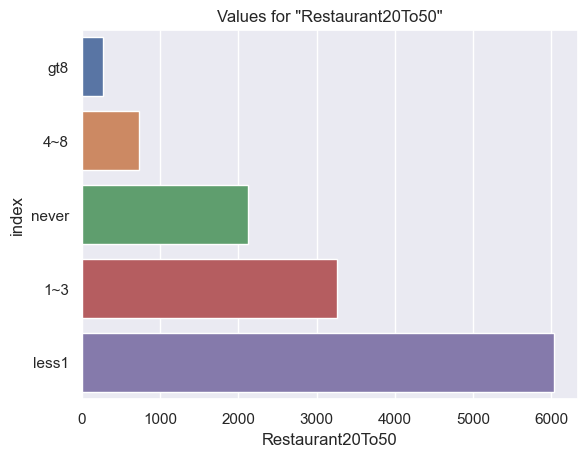

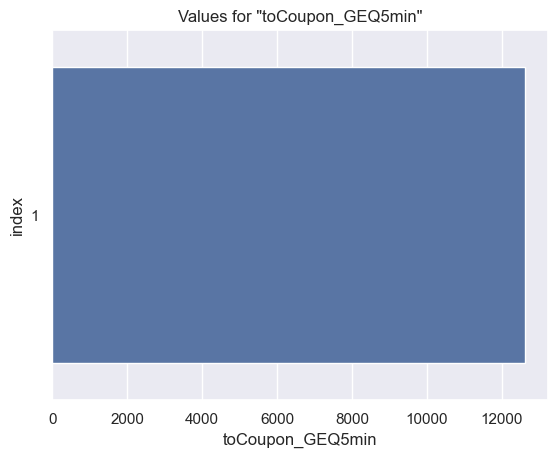

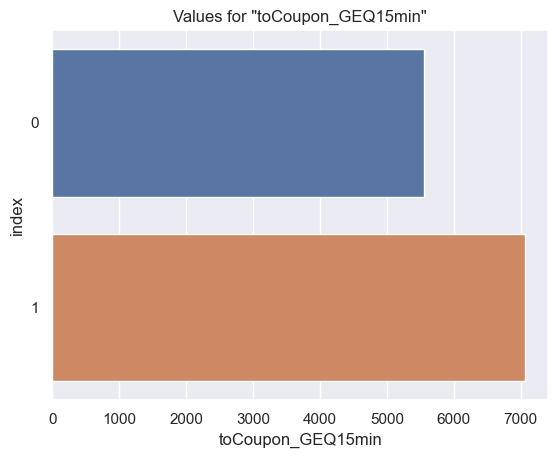

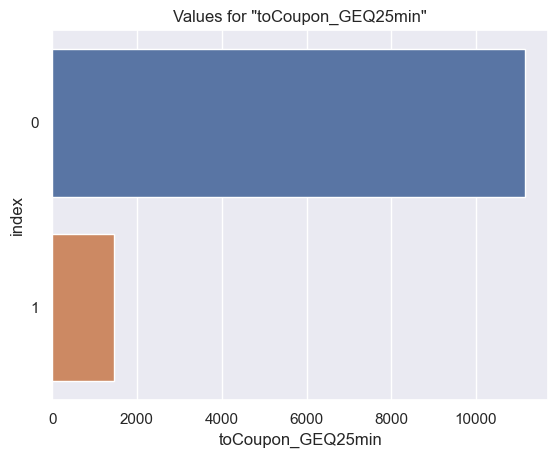

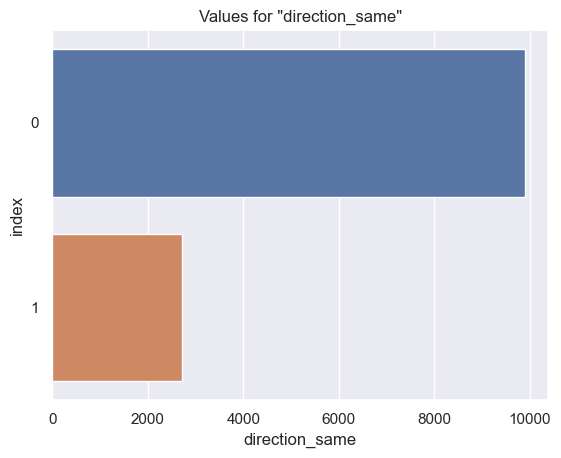

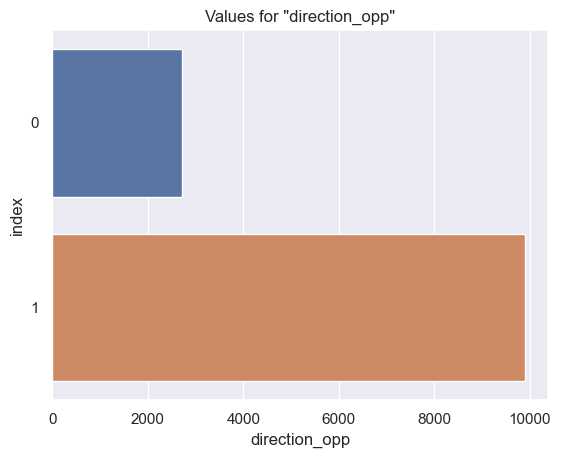

In [28]:
# We will plot each data feature's unique values against their observed counts
# to better understand distribution of each feature

# Iterate through all columns in the dataset, creating a subplot for each
for i in data.columns:
   
    # For each column:
    # 1. get the unique value counts for the feature
    # 2. push it into a dataframe
    # 3. reset the index such that the values are plottable
    # 4. sort values by counts to maintain visual reading consistency in each plot (ascending value counts)
    data_values = pd.DataFrame(data[i].value_counts()).reset_index().sort_values(i)
    
    # Generate the plot for each temporary dataframe representing value counts
    plt.figure()
    sns.barplot(x=i, y="index", data=data_values, orient='h').set_title('Values for "' + i + '"')
    
# Clean up: Release the plots from memory
plt.close()


---
> ##### Insights/Observations: Univariate Analysis
From reviewing the feature plots representing occurrences of each's unique values (above), the following is observed:
> * Most targeted drivers/customers:
>   * were either unemployed or students (`occupation`)
>   * were young adults, between ages 21-31 (`age`)
>   * were driving predominantly driving alone, with no urgent place to go, in hot and sunny weather (`passenger`, `destination`, `weather`, `temperature`)
>   * were fairly comparable in gender and slightly favored those without children (`gender`, `has_children`)
>   * either had some college education or held an undergraduate degree (`education`)
>   * made almost, or less than half of the [average US Househould income](https://www.statista.com/statistics/203183/percentage-distribution-of-household-income-in-the-us/ "from: Statista.com") (`income`)
> * Most coupons offered were:
>   * to businesses at least 5 minutes away, largely between 15-25 minutes from the driver's location, but in the opposite direction they were travelling in (`toCoupon_GEQ*`, `direction*`)
>   * largely offered during peak driving times (in the US), at 7am and 6pm (`time`)
>   * to coffee shops, followed by less expensive restaurants (`coupon`)
>   * targeting drivers that infrequently went the different businesses types offered (`Bar`, `CoffeeHouse`, `CarryAway`, `RestaurantsLessThan20`, `Restaurant20To50`)
> * As previously mentioned:
>   * we can only consider one of the two `direction*` features as they are inverses of each other
>   * we will treat `car` feature as anecdotal information, due to significant missing data
>
> ##### For further review: Evaluate through bivariate/multivariate analysis 
> 1. Perhaps the coupons are sent too late *(geo-fencing/trigger time improvement?)*, as most destinations seem to be in the opposite direction travelled according to the `direction*` features. 
> 2. Determine if the coupon types correlate to time of day, e.g. 7am coupons were for coffee shops, 10pm coupons were for bars or take away.
> 3. Determine how many lower-income drivers accepted the coupons, perhaps indicating discretionary spending trends.
> 4. Determine if the coupon offered to a driver correlates to low visit frequency to the same type of business, suggesting a new customer acquisition advertising strategy (as opposed to building loyalty in, or rewarding, more frequent visitors).
> 5. How do the value rankings within each feature change/correlate when we apply context of coupon acceptance?
---

> ##### 2.5. Explore numerical features for correlations (Multivariate analysis)

In [17]:
# Explore statistical analysis of numerical values within features
data.describe([.6, .7, .8, .9, .95, .99])

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12610.000000,12610.000000,12610.0,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000
mean,63.267248,0.414512,1.0,0.559794,0.116019,0.215543,0.784457,0.567565
std,19.153386,0.492657,0.0,0.496432,0.320260,0.411215,0.411215,0.495434
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
60%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
70%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
80%,80.000000,1.000000,1.0,1.000000,0.000000,1.000000,1.000000,1.000000
90%,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
95%,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


<Figure size 1000x600 with 0 Axes>

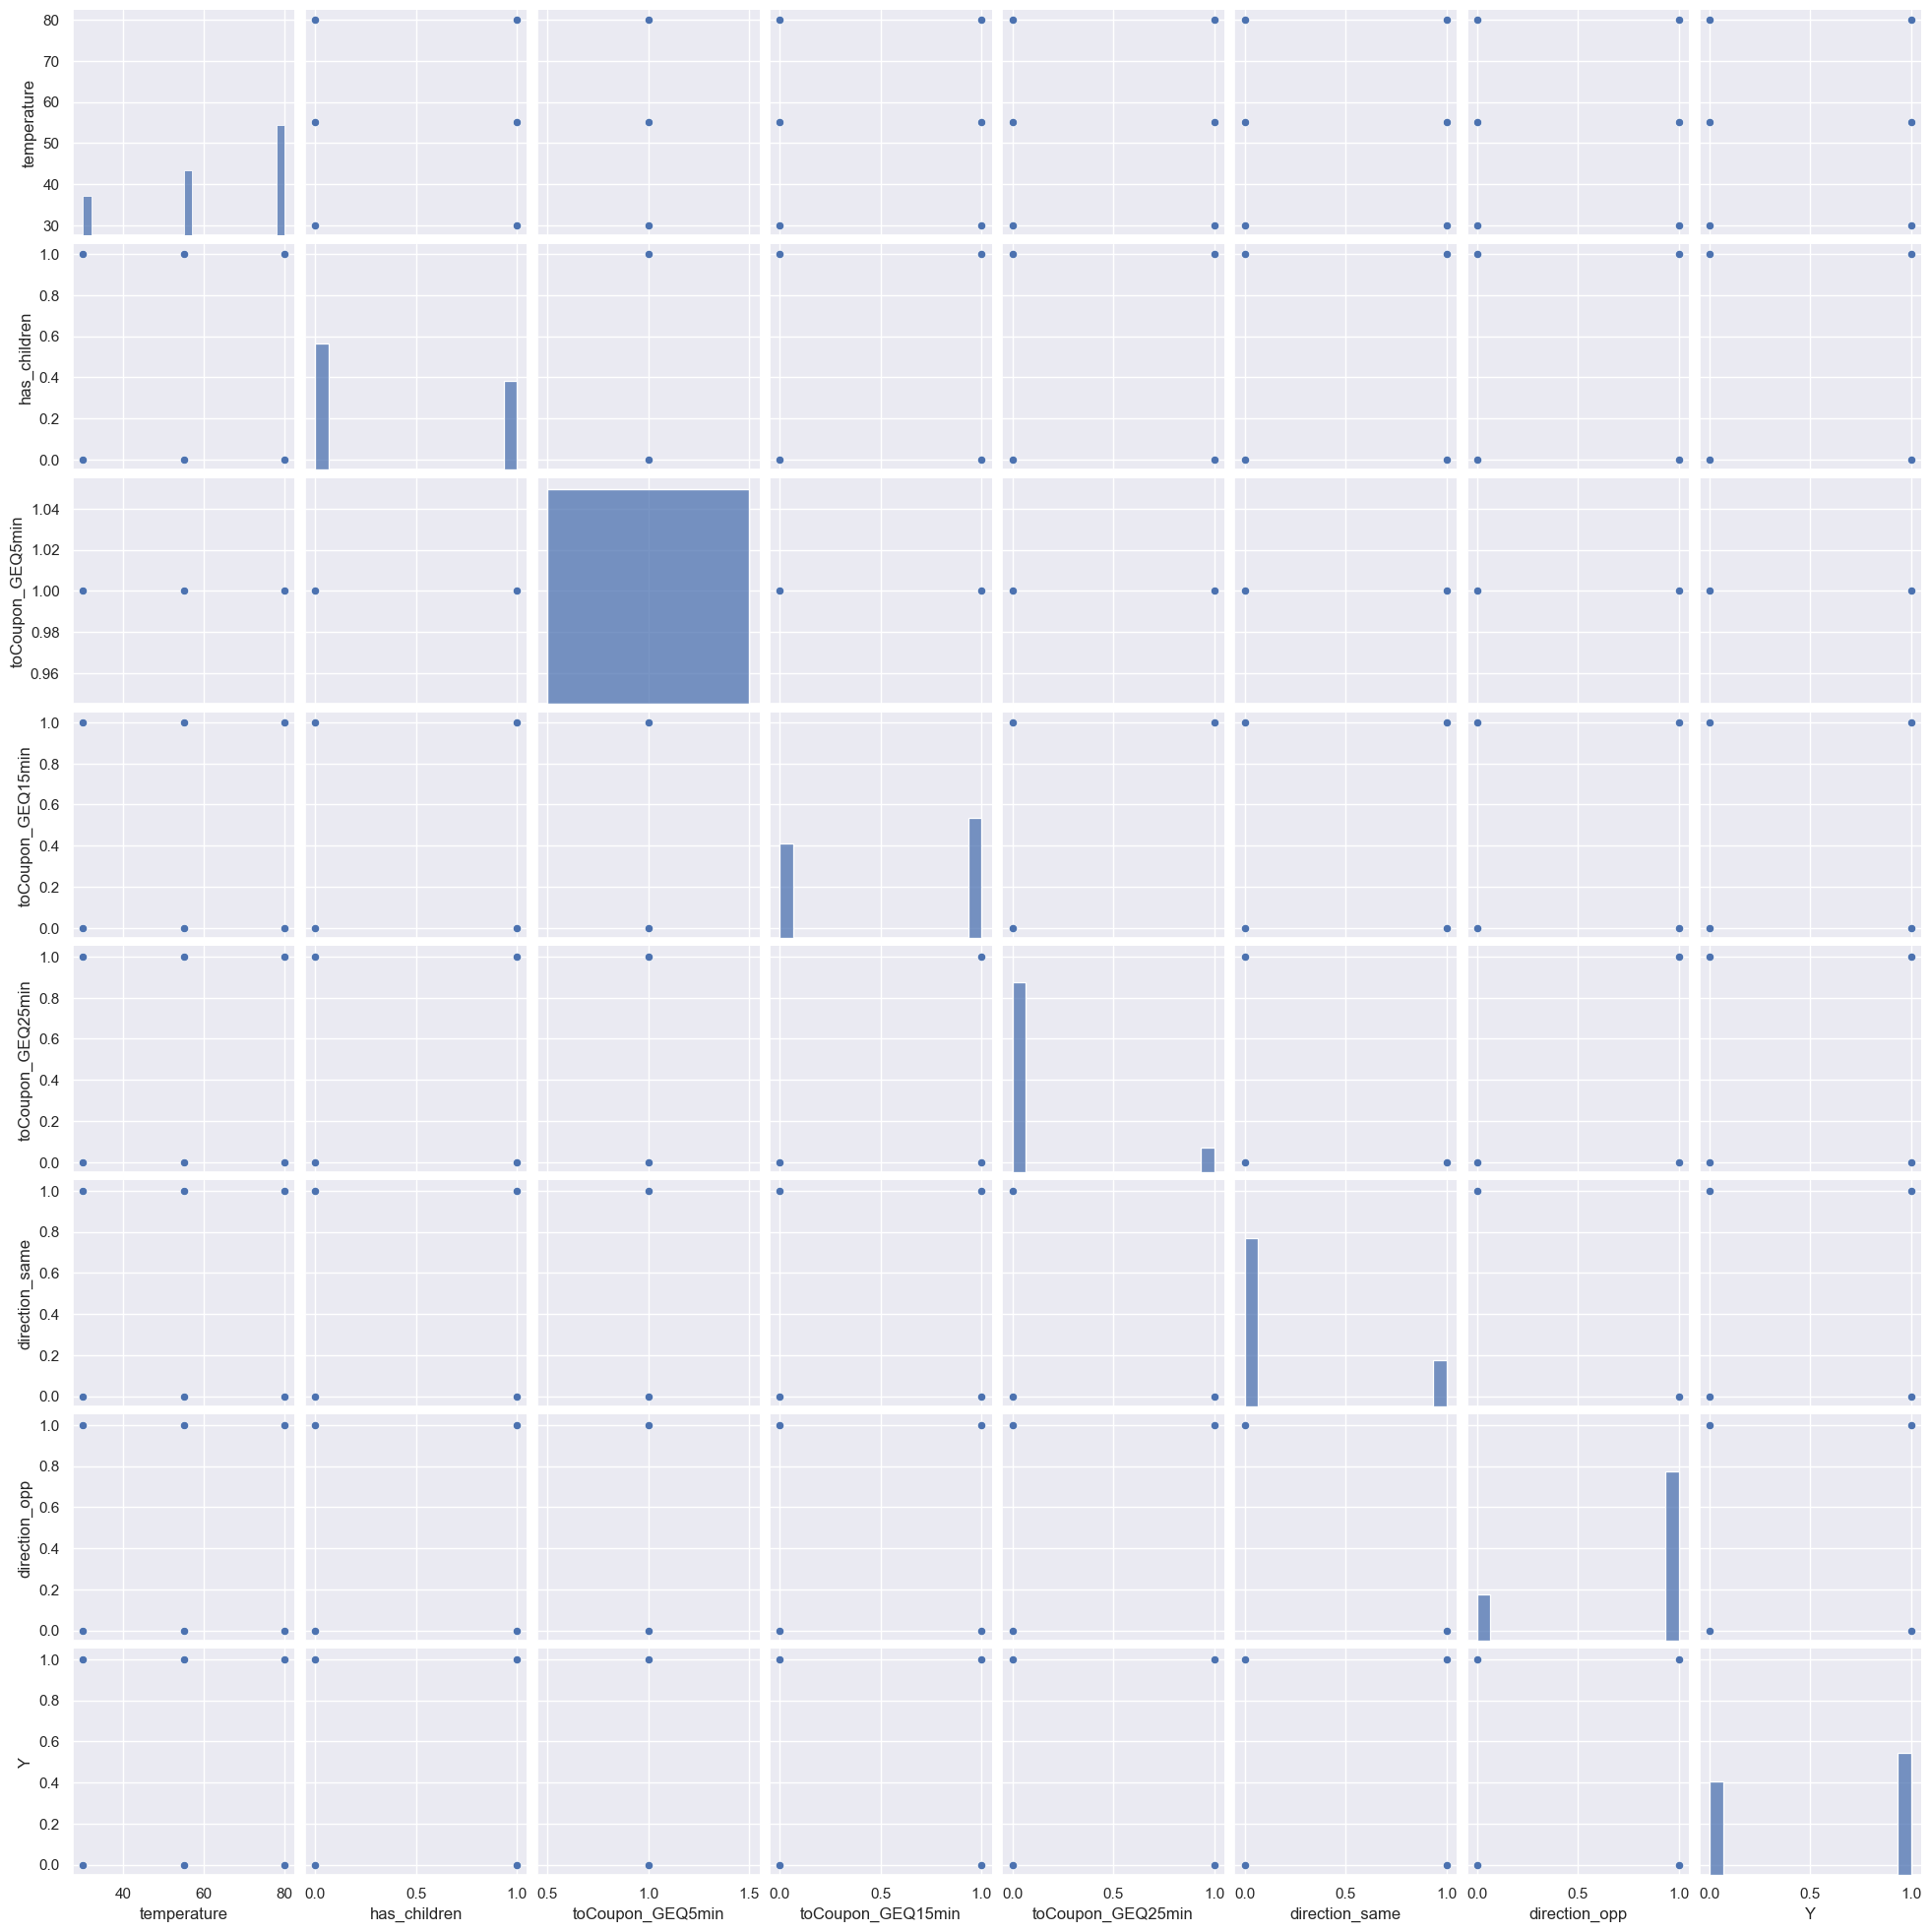

In [18]:
# Let's take a multivariate visual reference of numerical features through pairplotting
plt.figure(figsize=(10,6));
sns.pairplot(data);

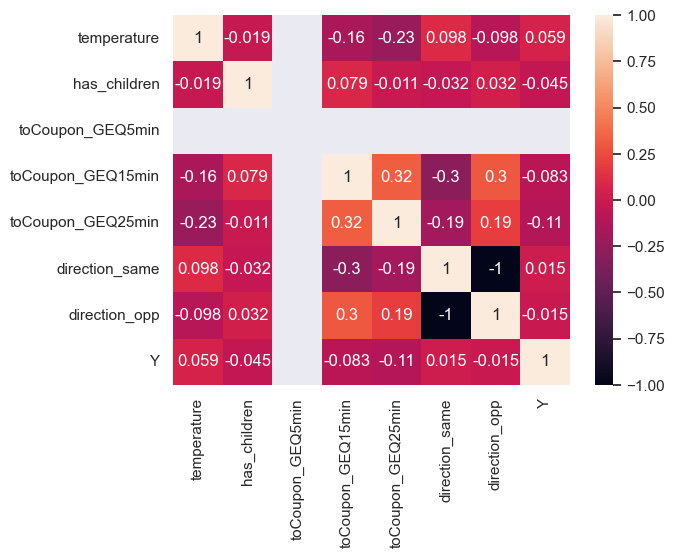

In [19]:
# Let's understand any correlations via heatmap
sns.heatmap(data.corr(), annot=True);


In [20]:
# Dive into the distance feature, which currently seems to be represented by 3 different columns.
# Examine all three columns to understand the population logic.

# First, let's get the relevant columns that contain "toCoupon_GEQ" in their name, 
# and then convert the object to a list
distance_cols = data.columns[data.columns.str.contains("toCoupon_GEQ")].tolist()

# Now, let's see how these values are populated for both coupon accepted/not accepted cohorts,
# reviewing the sum and mean
data.groupby("Y")[distance_cols].agg(["sum", "mean"])

toCoupon_GEQ5min      toCoupon_GEQ15min           toCoupon_GEQ25min  \
               sum mean               sum      mean               sum   
Y                                                                       
0             5453  1.0              3309  0.606822               849   
1             7157  1.0              3750  0.523963               614   

             
       mean  
Y            
0  0.155694  
1  0.085790

>### **Insight(s):** 
>* The strong (1:1) negative correlation between `direction_same` and `direction_opp` is expected (by design), thus we can ignore one of the columns in futher reviews.
>* From the above review of **_numerical features_**, there are no other valuable strong negative or positive correlations observed. 
>* The `toCoupon_GEQ*` maching columns seem to be inclusive of the smaller distances (e.g. "5min" = 1 when distance was "15min". There may be benefit to creating a new categorical data feature from the "GEQ" collection of columns that derives the furthest tallied distance

> ##### 2.6. Explore categorical features for correlations (Multivariate analysis)

In [21]:
# What does the total population look like?
data.describe(include="O")


,destination,passenger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,12610,12610,12610,12610,12610,12610,12610,12610,12610,12610,12610,12610,108,12503,12393,12460,12481,12421
unique,3,4,3,5,5,2,2,8,5,6,25,9,5,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,1d,Female,21,Married partner,Some college - no degree,Unemployed,$25000 - $37499,Scooter and motorcycle,never,less1,1~3,1~3,less1
freq,6266,7248,10011,3220,3989,7031,6469,2642,5068,4325,1861,2006,22,5178,3362,4645,5356,6041


In [22]:
# How about for only those that accepted a coupon?
data.query("Y == 1").describe(include="O")

,destination,passenger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,7157,7157,7157,7157,7157,7157,7157,7157,7157,7157,7157,7157,62,7102,7047,7057,7068,7052
unique,3,4,3,5,5,2,2,8,5,6,25,9,5,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,1d,Male,21,Single,Some college - no degree,Unemployed,$25000 - $37499,Car that is too old to install Onstar :D,never,1~3,1~3,1~3,less1
freq,3969,3801,5941,1881,1989,4390,3622,1579,2851,2577,1019,1190,17,2751,2089,2693,2994,3363


In [23]:
# And conversely, how about for only those that did not accept any coupon?
data.query("Y == 0").describe(include="O")

,destination,passenger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,5453,5453,5453,5453,5453,5453,5453,5453,5453,5453,5453,5453,46,5401,5346,5403,5413,5369
unique,3,4,3,5,5,2,2,8,5,6,25,9,5,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,7AM,Coffee House,2h,Female,21,Married partner,Bachelors degree,Unemployed,$25000 - $37499,crossover,never,never,1~3,1~3,less1
freq,2297,3447,4070,1561,2000,2812,2934,1063,2319,1928,842,816,13,2427,1598,1952,2362,2678


3. Decide what to do about your missing data -- drop, replace, other...

In [24]:
# Review: `car` feature
# It contains < 1% values populated, and cannot consider it in modeling even if it would be valuable information
# Rather than drop it, keep it for now in case there's further granular insights as we dive deeper

# TODO - Explore further if any way to interpolate car data, though unlikely

# data = data.drop("car", axis=1)

In [25]:
# From above missing values review, as the remaining columns are categorical features indicating preference, 
# leave missing data as-is to not lose more important coupon receptivity information. 

4. What proportion of the total observations chose to accept the coupon? 



Proportion of total observations that have accepted the coupon: 57%


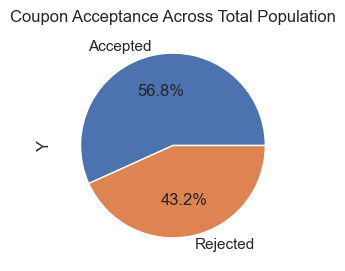

In [26]:
# First, let's identify how many customers (total population) accepted or rejected a coupon
coupon_acceptance = data["Y"].value_counts(normalize=True)

# Then, let's get a quick visual reference by viewing the percentage of response in a "pie" chart
plt.figure(figsize=(6, 3))
coupon_acceptance.plot(labels=["Accepted", "Rejected"], kind="pie", autopct='%1.1f%%')\
        .set_title("Coupon Acceptance Across Total Population");

print("Proportion of total observations that have accepted the coupon: " 
      + str(round(coupon_acceptance[1]*100)) + "%")


5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 0, 'Number of Coupons Offered')

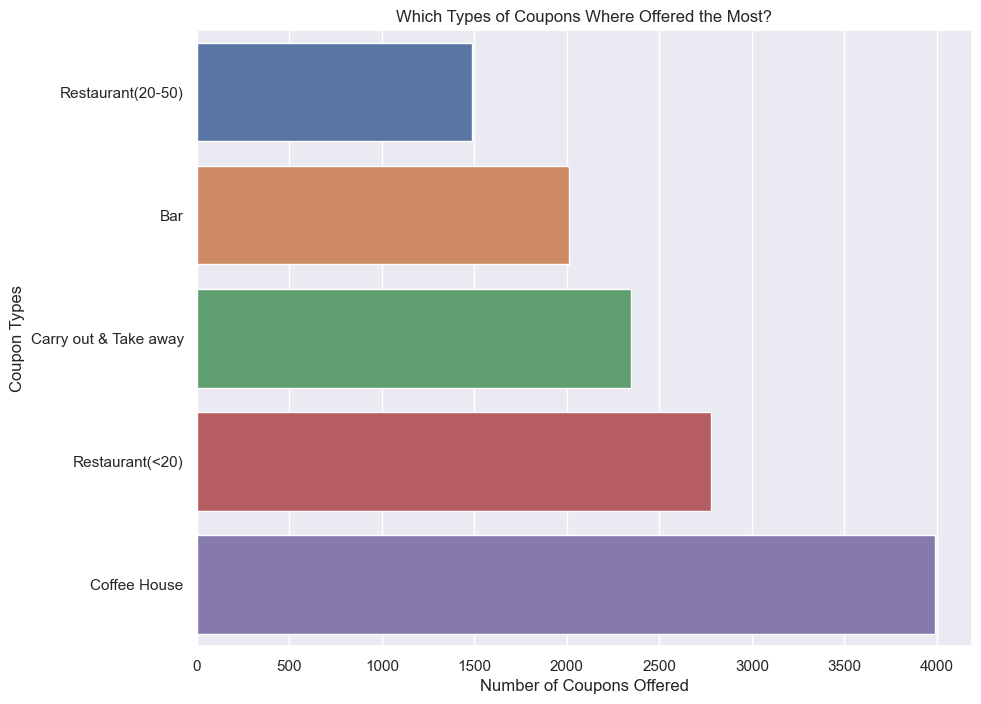

In [33]:
# Following the same procedure as above for iterative univariate analysis, focusing on `coupon` feature
# 1. get the unique value counts for the feature
# 2. push it into a dataframe
# 3. reset the index such that the values are plottable
# 4. sort values by counts to maintain visual reading consistency in each plot (ascending value counts)
coupon_values = pd.DataFrame(data["coupon"].value_counts()).reset_index().sort_values("coupon")

# Generate the plot representing value counts
plt.figure(figsize = (10,8))
sns.barplot(x="coupon", y="index", data=coupon_values, orient='h').set_title('Which Types of Coupons Where Offered the Most?')
plt.ylabel("Coupon Types")
plt.xlabel("Number of Coupons Offered")


6. Use a histogram to visualize the temperature column.

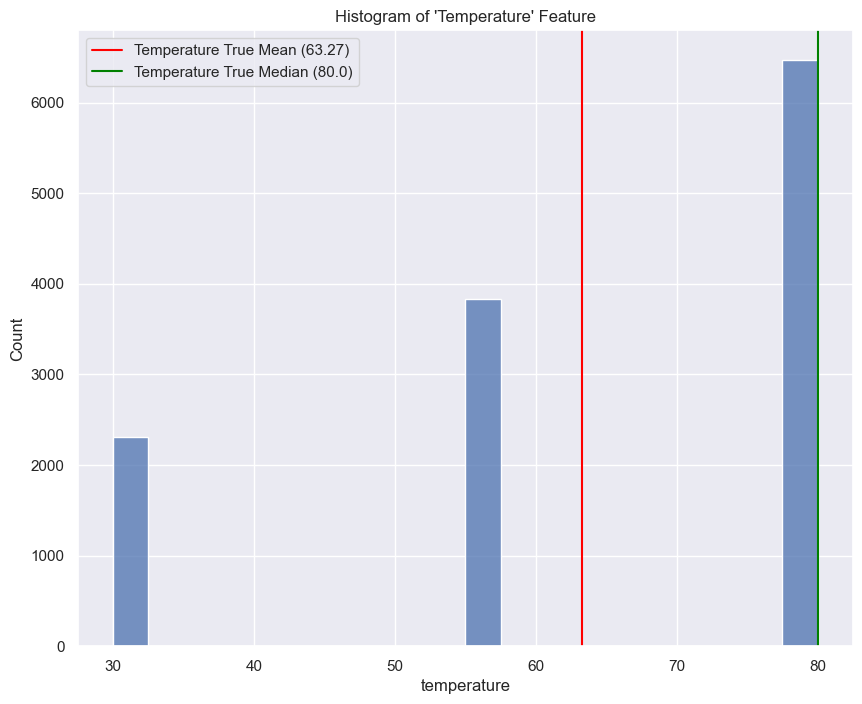

In [34]:
# Calculate the true Mean and Median for Temperature feature
hist_temperature_mean = round(data["temperature"].mean(),2)
hist_temperature_median = data["temperature"].median()

# plot histogram of 'temperature' values
plt.figure(figsize = (10,8))
sns.histplot(data["temperature"], bins=20);
plt.axvline(x = hist_temperature_mean, label = "Temperature True Mean (" + str(hist_temperature_mean) + ")", color = "red");
plt.axvline(x = hist_temperature_median, label = "Temperature True Median (" + str(hist_temperature_median) + ")", color = "green")
plt.title("Histogram of 'Temperature' Feature")

plt.legend()
plt.show();

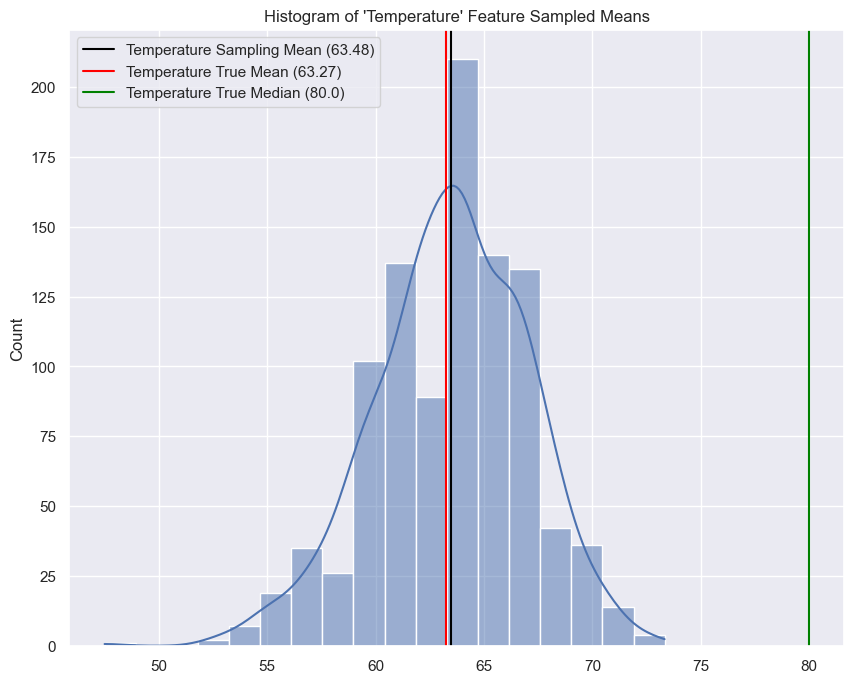

In [35]:
# defining an empty list to sample temperature means
hist_temperature_mean_list = []

# Iterate over a range to determine the sampled mean for Temperature feature (in this case, 1000 observations)
for temp_sample in range(1,1000):
        # append the mean of a sampling from the Temperature feature, 
        # in this case, 30 samples from the set
        
        hist_temperature_mean_list.append(round(data["temperature"].sample(30, random_state = temp_sample, 
            replace=True).mean(),3))
        
        
# print the mean
temp_sample_mean = round(np.mean(hist_temperature_mean_list),2)


plt.figure(figsize = (10,8))
sns.histplot(hist_temperature_mean_list, kde = True, bins = 18);
plt.axvline(x = temp_sample_mean, color = "black", label = "Temperature Sampling Mean (" + str(temp_sample_mean) + ")")
plt.axvline(x = hist_temperature_mean, label = "Temperature True Mean (" + str(hist_temperature_mean) + ")", color = "red");
plt.axvline(x = hist_temperature_median, label = "Temperature True Median (" + str(hist_temperature_median) + ")", color = "green")
plt.title("Histogram of 'Temperature' Feature Sampled Means")

plt.legend()
plt.show();

In [ ]:
# Not for use, remove before submission (just for quick visualization)

#import sweetviz as sv

#my_report = sv.analyze(data)
#my_report.show_html()

In [ ]:
# Not for use, remove before submission (just for quick visualization)

#from ydata_profiling import ProfileReport

#prof = ProfileReport(data)
#prof.to_file(output_file="pa1_output.html")
#prof

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [38]:
coupon_bar = data.query('coupon == "Bar"')
coupon_bar.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,NaN,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,NaN,never,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


Proportion of observations that have accepted a `Bar` coupon: 41%


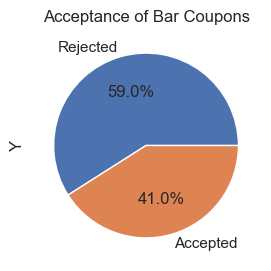

In [48]:
# As in Question (#4), let's evaluate the value distribution for coupon acceptance ("Y")
coupon_bar_accepted = coupon_bar["Y"].value_counts(normalize=True).copy()

# Then, let's get a quick visual reference by viewing the percentage of response in a "pie" chart
plt.figure(figsize=(6, 3))
coupon_bar_accepted.plot(labels=["Rejected", "Accepted"], kind="pie", autopct='%1.1f%%')\
        .set_title("Acceptance of Bar Coupons");

print("Proportion of observations that have accepted a `Bar` coupon: " 
      + str(round(coupon_bar_accepted[1]*100)) + "%")

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [49]:
# First let's remind ourselves what the "Bar" column looks like:
coupon_bar["Bar"].value_counts()

never    830
less1    563
1~3      397
4~8      150
gt8       49
Name: Bar, dtype: int64

In [51]:
# Now let's create a new column that groups values into the two sets in question:
# 3 or fewer (includes: ["never", "less1", "1-3"])
# greater than 3 (includes: ["4-8", "gt8"])

# create a mapping list
bar_visit_frequent = ["4~8", "gt8"]

coupon_bar["Bar_Cohort"] = coupon_bar["Bar"].apply(lambda x: "frequently" if x in bar_visit_frequent else "rarely")


/var/folders/v_/znwsdb7j7glgrrcz6v0_1lgw0000gn/T/ipykernel_62767/3648444795.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coupon_bar["Bar_Cohort"] = coupon_bar["Bar"].apply(lambda x: "frequently" if x in bar_visit_frequent else "rarely")


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  